# 🏠 House Price Prediction

***🤔💭Problem:***

Estimating house prices manually is difficult and often inaccurate due to the influence of multiple property features.

***📌Solution:***

This project builds a machine learning model that predicts house prices based on important property features such as living area, number of bedrooms, bathrooms, and house age. Using a ***Random Forest Regressor***, the model learns patterns from historical housing data and provides accurate price predictions for new houses.

# 📦Import Libraries 
- 🐼 ```pandas``` → used for loading and handling the dataset

- 📊 ```matplotlib.pyplot``` → used for data visualization

- 🌲 ```RandomForestRegressor``` → machine learning model

- 🧪 ```train_test_split``` → to split data for training and testing

- 📏 ```sklearn.metrics``` → to evaluate model performance

Importing libraries is always the first step in any ML or data science project.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 📂Load the Dataset 
- 📥 ```pd.read_csv()``` reads the CSV file

- 🏠 The dataset contains information about houses and their sale prices

- 👀 Viewing the first few rows helps understand the data structure

This step ensures the data is successfully loaded.

In [88]:
data = pd.read_csv("train.csv")
data.shape

(1460, 81)

# 🔍Explore the Dataset
Here, we explore the dataset to understand:

- 📏 Number of rows and columns

- 🧾 Column names

- ❓ Presence of missing values

Exploring the dataset helps us decide how to clean and prepare the data.

In [89]:
rows, cols = data.shape
print(f"Rows: {rows}, Columns: {cols}")
print("\nThe name of all columns in the data:")
print(data.columns.tolist())
print("\nThe number of missing values in the column:") 
print(data.isnull().sum())

Rows: 1460, Columns: 81

The name of all columns in the data:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'En

# 🎯Select Important Features 
- 📐 ```GrLivArea``` – Living area in square feet

- 🛏 ```BedroomAbvGr``` – Number of bedrooms

- 🚿 ```FullBath``` – Number of full bathrooms

- 🏗 ```YearBuilt``` – Year the house was built

- 💰 ```SalePrice``` – Target variable (house price)

This reduces complexity and improves model understanding.

In [90]:
features = [
    "GrLivArea",
    "BedroomAbvGr",
    "FullBath",
    "YearBuilt",
    "GarageCars",
    "OverallQual",
    "SalePrice"
]

data = data[features]
data.dropna(inplace=True)

data.head()


,GrLivArea,BedroomAbvGr,FullBath,YearBuilt,GarageCars,OverallQual,SalePrice
0,1710,3,2,2003,2,7,208500
1,1262,3,2,1976,2,6,181500
2,1786,3,2,2001,2,7,223500
3,1717,3,1,1915,3,7,140000
4,2198,4,2,2000,3,8,250000


# 🧠✨Feature Engineering 
In this step, we create new meaningful features.

- 🕒 HouseAge = Current Year − YearBuilt

- 🧠 Converts raw data into a more useful representation

Feature engineering helps Random Forest capture patterns better.

In [91]:
# Create house age feature
data["HouseAge"] = 2024 - data["YearBuilt"]

# Drop YearBuilt after transformation
data.drop("YearBuilt", axis=1, inplace=True)

data.head()


,GrLivArea,BedroomAbvGr,FullBath,GarageCars,OverallQual,SalePrice,HouseAge
0,1710,3,2,2,7,208500,21
1,1262,3,2,2,6,181500,48
2,1786,3,2,2,7,223500,23
3,1717,3,1,3,7,140000,109
4,2198,4,2,3,8,250000,24


#  ✂️Split Features and Target
Here, the dataset is split into:

- 🔢 Features (X) → input variables

- 🎯 Target (y) → SalePrice

This separation is required for supervised learning.

In [92]:
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]


# 📈Data Visualization – Price Distribution 

This cell visualizes the distribution of house prices using a histogram.

- 📊 Shows how sale prices are spread

- ⚖ Helps identify skewness and outliers

- 👁 Improves understanding of the target variable


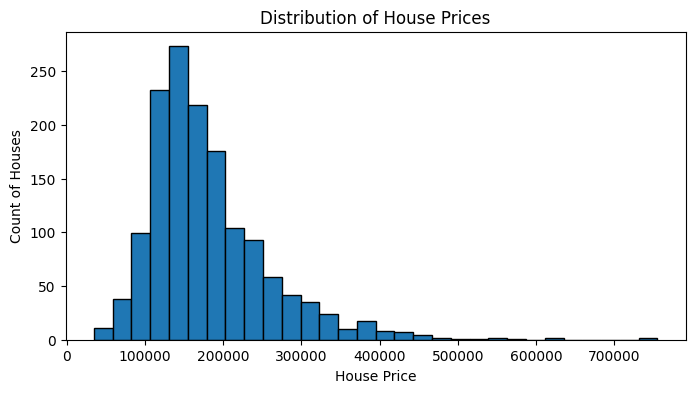

In [93]:
plt.figure(figsize=(8, 4))

plt.hist(data["SalePrice"], bins=30, edgecolor="black")
plt.xlabel("House Price")
plt.ylabel("Count of Houses")
plt.title("Distribution of House Prices")

plt.show()


#  🔄Train–Test Split

The dataset is split into training and testing sets.

- 🧠 ```Training set``` → used to train the model

- 🧪 ```Testing set``` → used to evaluate performance

This helps measure how well the model generalizes to unseen data.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Train the Random Forest Regressor 🌲🤖

In this cell, a Random Forest Regressor model is trained.

- 🌲 Random Forest uses multiple decision trees

- 🤝 Final prediction is the average of all trees

- 🎯 Handles non-linear relationships well

This model generally provides better accuracy than simple linear models.

In [95]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=300,
                      random_state=42)

# 🔮 Make Predictions 
After training, the model is used to make predictions on the test data.

- 🏡 The model predicts house prices

- 📤 Outputs numerical price values

This step shows how the trained model performs on unseen data.

In [96]:
rf_pred = rf.predict(X_test)
print(rf_pred[:5])

[140100.13117484 312103.11930976 108691.62741703 177795.38877743
 319505.53213889]


#  📊✅Evaluate Model Performance:
    
Model performance is evaluated using standard regression metrics:

* 📉 MAE (Mean Absolute Error) – average prediction error

* 📉 RMSE (Root Mean Squared Error) – penalizes large errors

* 📈 R² Score – explains how well the model fits the data

Lower error values and higher R² indicate better performance.

In [97]:
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2 Score:", r2_score(y_test, rf_pred))


Random Forest Performance
MAE: 20706.425261987384
RMSE: 31750.132983349642
R2 Score: 0.8685752186763817


# 🔍🌲Feature Importance 

Random Forest provides feature importance values.

- 📊 Shows which features influence house price the most

- 🧠 Helps explain model behavior

- 🏆 Useful for feature selection and improvement

This improves model interpretability.

In [98]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind="barh", title="Feature Importance")


<Axes: title={'center': 'Feature Importance'}>

# 🏠💰Predict Price for New Input 

In this cell, the model predicts the price of a new house based on user-defined input values.

- 🏗 Uses house details such as area, bedrooms, bathrooms, etc.

- 💵 Outputs an estimated sale price

This demonstrates real-world usage of the trained model.

In [99]:
new_house = pd.DataFrame([{
    "GrLivArea": 1800,
    "BedroomAbvGr": 3,
    "FullBath": 2,
    "GarageCars": 2,
    "OverallQual": 7,
    "HouseAge": 10
}])

rf.predict(new_house)


array([232760.3047138])

# 💾Save the Trained Model

The trained model is saved for later use.

- 🔁 Avoids retraining every time

- 🌐 Used for deployment in a Streamlit web app

Saving models is a best practice in real-world ML systems.

In [100]:
import pickle

pickle.dump(rf, open("house_price_model.pkl", "wb"))
pickle.dump(X.columns, open("model_features.pkl", "wb"))

print("✅ Model saved successfully")


✅ Model saved successfully


# 🏁🎉Conclusion 
In this notebook:

- 📊 A real-world housing dataset was used

- 🧹 Data was cleaned and engineered

- 🌲 A Random Forest Regressor was trained

- 📈 Model performance was evaluated

- 💰 House prices were predicted successfully

This notebook represents a complete end-to-end Machine Learning pipeline.